<center>

*******************************************************************************************
    
### DYNAMIC TIME WARPING  
##### AND
### MINIMAL-WARPING PATH
  
<br>
  
##### 29 JULY 2023  

##### Juan Ignacio Mendoza Garay  
##### doctoral student  
##### Department of Music, Art and Culture Studies  
##### University of Jyväskylä  

*******************************************************************************************

</center>

#### INFORMATION:


* Description:

    Demonstrates the most simple (as in "easy to understand", not necessarily faster)
    algorithm for Dynamic Time Warping (also called "classical" version), an algorithm 
    to trace-back the optimal path (also "classical"), and a novel algorithm (as far as I am aware)
    to trace-back the optimal path with minimum time-warping.

* Instructions:

    Edit the values indicated with an arrow like this: <---  
    Comment/uncomment or change values as suggested by the comments.  
    Run the program, close your eyes and hope for the best.  

*******************************************************************************************


In [40]:
import numpy as np
from tslearn.metrics import dtw_path
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from time import time

*******************************************************************************************
#### TEST SIGNALS:


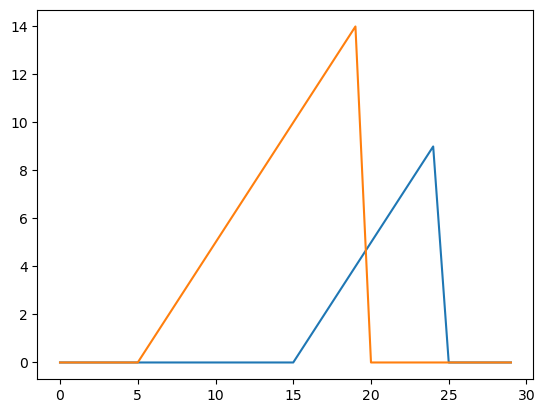

In [41]:
# EXAMPLE SET 1:
if True: # <---
    
    x = np.arange(0,30)
    y = np.zeros(x.size)
    y_1 = y.copy()
    y_2 = y.copy()
    #y_1[10:20] = np.arange(0,10,1)
    #y_2 = y_1 # <--- same shape, no lag
    #y_2[18:28] = np.arange(0,10,1) # <--- same shape, lag forwards (delay)
    #y_2[5:15] = np.arange(0,10,1) # <--- same shape, lag backwards (anticipation)
    #y_2[14:29] = np.arange(0,15,1) # <--- different shape, lag forwards (delay)
    #y_2[5:20] = np.arange(0,15,1) # <--- different shape, lag backwards (anticipation)
    
    #y_1[5:15] = np.arange(0,10,1)
    #y_2[10:25] = np.arange(0,15,1) 
    
    y_1[15:25] = np.arange(0,10,1)
    y_2[5:20] = np.arange(0,15,1) 
    
# EXAMPLE SET 2:
if False: # <--- 

    x = np.arange(0,10)
    y = np.zeros(x.size)
    y_1 = y.copy()
    y_2 = y.copy()
    y_1[1:6] = np.arange(0,5,1) # <--- 
    #y_1[3:8] = np.arange(0,5,1) # <--- 
    y_2[2:9] = np.arange(0,7,1) # <--- 

    
# EXAMPLE SET 3:
if False: # <--- 

    y_1 = np.array([8,7,6,5,5,6,7,8])
    y_2 = np.array([5,4,4,5,6,7,8,9])
    x = np.arange(0,y_1.size)

    
y_1_rs = y_1.reshape(-1,1)
y_2_rs = y_2.reshape(-1,1)
    
if True: # <--- you get the idea... yes you do
    plt.plot(y_1) 
    plt.plot(y_2)
    plt.pause(0.1)

*******************************************************************************************
#### METHOD 1:
Using the 'tslearn' library. Simple, fast, easy. Gets the job done with no hassle.


computation time DTW 1 = 0.0008609294891357422


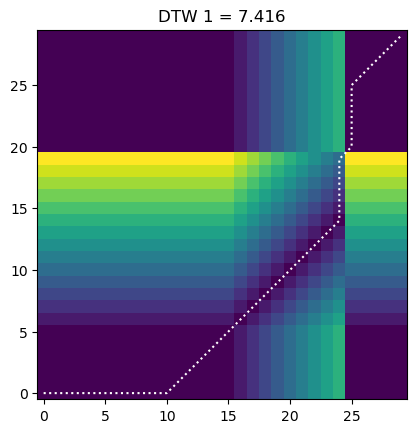

In [42]:
dm_1 = cdist( y_1_rs, y_2_rs , 'cityblock' )

tic = time()
optimal_path_1, dtw_score_1 = dtw_path(y_1, y_2)
print('computation time DTW 1 = '+str(time()-tic))

op_1_x = [col[0] for col in optimal_path_1]
op_1_y = [col[1] for col in optimal_path_1]

if True:
    plt.imshow(dm_1.T, origin='lower')
    plt.plot(op_1_x, op_1_y, ':w')
    plt.title('DTW 1 = '+str(round(dtw_score_1,3)))

*******************************************************************************************
#### METHOD 2:
Using hand-made, home-brewed, simple, raw and no-BS code written with love by your humble servant.


computation time DTW 2 = 0.007886171340942383
computation time classical optimal path = 0.002437114715576172


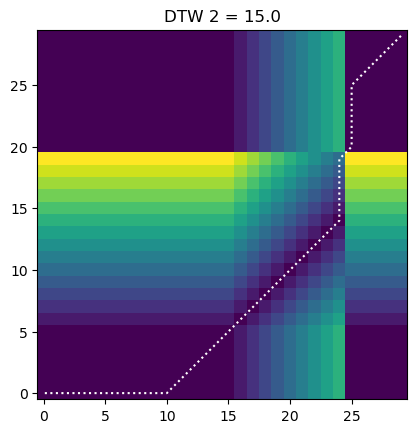

In [43]:
# REFERENCES: 
# https://tslearn.readthedocs.io/en/stable/user_guide/dtw.html
# https://en.wikipedia.org/wiki/Dynamic_time_warping
# Müller, M. (2007). Dynamic time warping. Information retrieval for music and motion, 69-84.

tic = time()
dm_2 = cdist( y_1_rs, y_2_rs , 'cityblock' )

# initialisation:
C = np.empty((dm_2.shape[0]+1,dm_2.shape[1]+1))
C[:] = np.inf
C[0,0] = 0

# main loop:
for i in range(1,C.shape[0]):
    for j in range(1,C.shape[1]):
        C[i,j] = dm_2[i-1,j-1] + min(C[i-1, j], C[i, j-1], C[i-1, j-1]) # goes barebones
        # C[i,j] = dm_2[i-1,j-1]**2 + min(C[i-1, j], C[i, j-1], C[i-1, j-1]) # gets cocky

dtw_score_2 = C[i,j] # barebones
#dtw_score_2 = np.sqrt(C[i,j]) # cocky


# trace-back path:
tic_1 = time()
i, j = np.array(C.shape)-2
optimal_path_2 = [[i,j]]
while (i > 0) or (j > 0):
    
    tb = np.argmin((C[i, j], C[i, j + 1], C[i + 1, j]))
    
    if tb == 0:
        i -= 1
        j -= 1
    elif tb == 1:
        i -= 1
    else:  # (tb == 2):
        j -= 1
          
    optimal_path_2.append([i,j])

print('computation time DTW 2 = '+str(time()-tic))
print('computation time classical optimal path = '+str(time()-tic_1))

op_2_x = [col[0] for col in optimal_path_2]
op_2_y = [col[1] for col in optimal_path_2]

if True:
    plt.imshow(dm_2.T, origin='lower')
    plt.plot(op_2_x, op_2_y, ':w')
    plt.title('DTW 2 = '+str(round(dtw_score_2,3)))
    

Notice that the 'barebones' (default) version of method 2 returns a DTW based on absolute differences, not on the Euclidean distance as in the 'cocky' version used by the tslearn library.

computation time minimum optimal path = 0.0038061141967773438


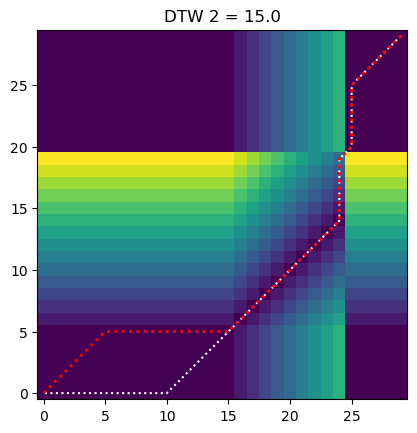

In [44]:
# trace-back minimum warping path:

tic = time()
i, j = np.array(C.shape)-2
optimal_path_3 = [[i,j]]
while (i > 0) or (j > 0):
        
    this_query = (C[i, j], C[i, j + 1], C[i + 1, j])
    this_min = np.min(this_query)
    these_argmins = np.where(this_query==this_min)

    if these_argmins[0][0] == 0:
        
        if (np.any(these_argmins[0][:] == 1)) and (i > j):
            
            i -= 1
            
        elif (np.any(these_argmins[0][:] == 2)) and (j > i):
            
            j -= 1
            
        else:
            
            i -= 1
            j -= 1
            
    elif these_argmins[0][0] == 1:
        
        i -= 1
        
    elif these_argmins[0][0] == 2:
        
        j -= 1
          
    optimal_path_3.append([i,j])

print('computation time minimum optimal path = '+str(time()-tic))

op_3_x = [col[0] for col in optimal_path_3]
op_3_y = [col[1] for col in optimal_path_3]

if True:
    plt.imshow(dm_2.T, origin='lower')
    plt.plot(op_2_x, op_2_y, ':w')
    plt.plot(op_3_x, op_3_y, ':r', linewidth=2)
    plt.title('DTW 2 = '+str(round(dtw_score_2,3)))

The algorithm for the minimum warping path (in red) will try to get closer to the diagonal.